In [1]:
import numpy as np
import pandas as pd
import math

import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
from sklearn.preprocessing import StandardScaler

In [3]:
irr_idx=df[(df['qiren']=='旗人')|(df['fangkeben_only']==1) |
           (df['xing'].isnull() & df['ming'].isnull() & 
            df[ 'zihao'].isnull())].index.tolist()
malformed_idx=df[(df['year'].isin(['銀庫', '蒙古',7.0])) | 
                 (df['pinji_numeric']=='州') | df['year'].isnull() |
                df['qiren'].isnull() | (df['xuhao']=='麗')].index.tolist()
to_remove=set(irr_idx)|set(malformed_idx)

In [4]:
df.drop(to_remove, inplace=True)
df['year']=df['year'].astype(float)
df['pinji_numeric']=df['pinji_numeric'].astype(float)
df['xuhao']=df['xuhao'].astype(int)
df.drop(df[df['xuhao']>=20000].index.tolist(), inplace=True)

In [5]:
def str2float(s):
    if s in [np.nan, '不入流', '未入流']:
        return 10.0
    if s=='從一品(應為正四品)':
        return 4.0
    dic=dict(zip(['一', '二','三','四','五', '六','七','八','九'], np.arange(1,10)))
    base = dic[s[-2]]
    base+=0.5*('從' in s)
    return float(base)
for i in df['pinji_detailed'].unique():
    print(i, 'converted into', str2float(i))

nan converted into 10.0
正八品 converted into 8.0
正七品 converted into 7.0
從九品 converted into 9.5
正六品 converted into 6.0
從五品 converted into 5.5
正五品 converted into 5.0
從七品 converted into 7.5
未入流 converted into 10.0
從六品 converted into 6.5
正二品 converted into 2.0
從四品 converted into 4.5
正九品 converted into 9.0
正四品 converted into 4.0
從三品 converted into 3.5
八品 converted into 8.0
正三品 converted into 3.0
從一品 converted into 1.5
正一品 converted into 1.0
從二品 converted into 2.5
從八品 converted into 8.5
從一品(應為正四品) converted into 4.0
三品 converted into 3.0
九品 converted into 9.0
四品 converted into 4.0
不入流 converted into 10.0
六品 converted into 6.0
一品 converted into 1.0
二品 converted into 2.0
七品 converted into 7.0
五品 converted into 5.0


In [6]:
df['pinji_detailed_numeric']=df['pinji_detailed'].apply(str2float)

total number of people 1824624

number of unique diqu （地区） 34
Top 20: [('京師', 277411), ('直隸', 137009), ('山東', 117227), ('四川', 108514), ('廣東', 100973), ('河南', 96405), ('江西', 94022), ('浙江', 93826), ('山西', 83787), ('湖北', 75208), ('江南', 73057), ('福建', 72888), ('湖南', 71482), ('雲南', 70277), ('廣西', 70100), ('陝西', 67441), ('安徽', 60790), ('貴州', 50984), ('甘肅', 45787), ('江蘇', 32316)]

number of unique guanzhi（官职) 25738
Top 20: [('典史', 218672), ('知縣', 197723), ('訓導', 139029), ('復設訓導', 127792), ('復設教諭', 117965), ('主事', 77227), ('教諭', 75397), ('學正', 38830), ('吏目', 36705), ('教授', 34693), ('知州', 30936), ('縣丞', 30325), ('經厯', 22609), ('知府', 22031), ('翰林院編修', 19527), ('郎中', 14866), ('員外郎', 12710), ('翰林院庶吉士', 10744), ('司獄', 9470), ('經歷', 8398)]

number of unique jigou_1 （机构一） 1089
Top 20: [('翰林院衙門', 41080), ('刑部衙門', 30615), ('順天府', 28839), ('戶部衙門', 25653), ('兗州府', 24549), ('總漕部院衙門', 19932), ('廣州府', 19043), ('兵部衙門', 16523), ('按察司衙門', 15704), ('西安府', 14864), ('開封府', 14473), ('保定府', 14095), ('濟南府', 13810), 

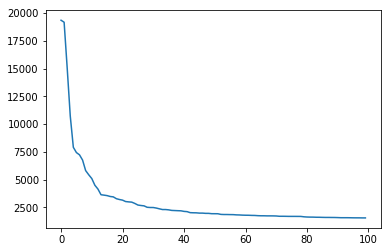

In [88]:
def plot_distri(arr, name):
    long_flag=False
    if len(arr.shape)==1:
        print('number of unique {}'.format(name), arr.unique().shape[0])
    else:
        
        print('number of unique {}'.format(name), arr.groupby(list(arr.columns)).ngroups)
        long_flag=True
    item_count={}
    for item in arr.values:

        if long_flag:
            it = tuple(item)
        else: 
            it=item
        
        if it not in item_count:
            item_count[it]=1
        else:
            item_count[it]+=1
    sorted_two_tuples=sorted(list(item_count.items()), key=lambda x:-x[1])
    print('Top 20:', sorted_two_tuples[:20])
    print()
    return sorted_two_tuples
#     plt.plot(sorted(item_count.values(),reverse=True))
print('total number of people', df.shape[0], end='\n\n')

plot_distri(df['diqu'], 'diqu （地区）')
plot_distri(df['guanzhi'],'guanzhi（官职)')
plot_distri(df['jigou_1'], 'jigou_1 （机构一）')
sorted_two_tuples=plot_distri(df[['jigou_1', 'guanzhi']], '(jigou_1, guanzhi) pair （机构一+官职）')
sorted_two_tuples2=plot_distri(df[['jigou_1', 'jigou_2','guanzhi']], '(jigou_1, jigou_2, guanzhi) tuple （机构一+机构二+官职）')
plt.plot(pd.DataFrame(sorted_two_tuples)[1][:100])
# print(df.groupby(['guanzhi', '', '']))

## the 5000th position has more than 60 records -> the defnition for position is suitable

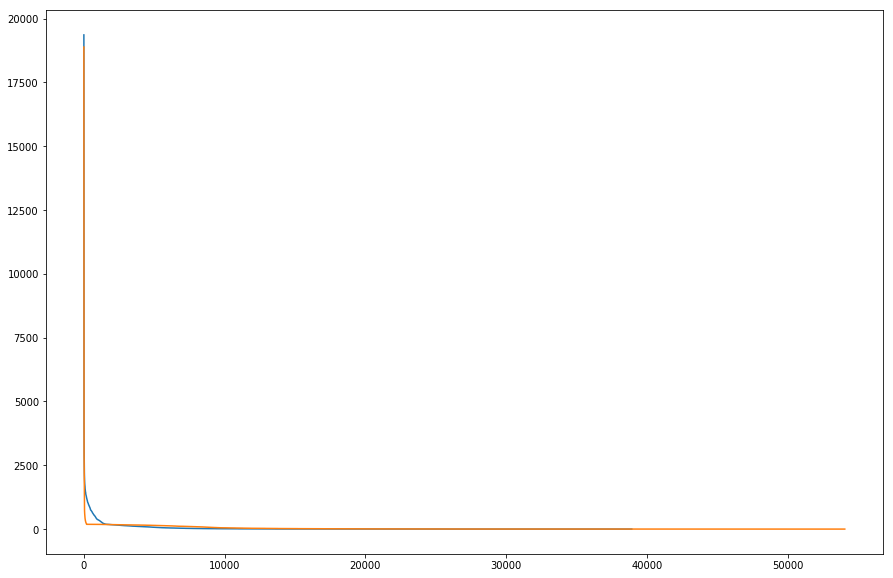

In [89]:
plt.figure(figsize=(15,10))
plt.plot(pd.DataFrame(sorted_two_tuples)[1])
plt.plot(pd.DataFrame(sorted_two_tuples2)[1])


## Micro Measurement: in unit of shortest segment with length 1

In [83]:
ppry=df[['unique_id', 'jigou_1', 'guanzhi', 'pinji_detailed_numeric', 'year']] #person_position_rank_year
pos_score={} #{pos->[promotions, count]}
duplicate_count=0
for id_, subtable in tqdm(ppry.groupby('unique_id')):
    
    pre_year=None
    pre_pinji=None
    pre_pos=None
    for index, row in subtable.sort_values('year').iterrows():
#         print(row)
        if not pre_year:
            pre_year=row['year']
            pre_pinji=row['pinji_detailed_numeric']
            pre_pos=(row['jigou_1'], row['guanzhi'])
        else:
            promotion=row['pinji_detailed_numeric']-pre_pinji
            time=row['year']-pre_year
            if time==0:
                duplicate_count+=1
                #update tracking variables
                pre_year=row['year']
                pre_pinji=row['pinji_detailed_numeric']
                continue
            
            # update pos_score for pre_pose
            if pre_pos in pos_score:
                pos_score[pre_pos][0]+=(promotion/time)
                pos_score[pre_pos][1]+=1
            else:
                pos_score[pre_pos]=[promotion/time, 1]
                
            #update tracking variables
            pre_year=row['year']
            pre_pinji=row['pinji_detailed_numeric']
            pre_pos=(row['jigou_1'], row['guanzhi'])

In [84]:
print(duplicate_count)

16573


In [85]:
pos_score_micro=pos_score
pos_normscore={}
curoff_occurences=100
for key, value in pos_score_micro.items():
    if value[1]<curoff_occurences: # MUST do this filteration to remove noise: remove occurences < 5
        continue
    pos_normscore[key]=[value[0]/value[1], value[1]]
pos_ranking_micro=sorted(list(pos_normscore.items()), key=lambda x: -x[1][0])
from pprint import pprint
pprint(pos_ranking_micro[:30])

[(('按察司衙門', '廣東等處提刑按察使司按察使統轄全省驛傳事務'), [3.55300422705314, 112]),
 (('翰林院衙門', '翰林院侍講'), [1.3191198060759048, 151]),
 (('都察院衙門', '經厯'), [1.1329479768786126, 173]),
 (('總漕部院衙門', '掌印守備'), [1.0471874742139051, 2916]),
 ((nan, '巡撫兼理提督統轄全省等處地方軍務節製各鎮'), [0.9087034649791005, 106]),
 (('郵傳部衙門', '候補主事'), [0.8270676691729323, 133]),
 (('順天府', '順天府府尹'), [0.7645527228327228, 125]),
 (('翰林院衙門', '翰林院修撰'), [0.6845631995932572, 605]),
 ((nan, '督標中軍副將'), [0.6577659888004715, 145]),
 (('兗州府', '七品執事官'), [0.6577446014396161, 682]),
 (('兗州府', '五品執事官'), [0.6471074380165289, 484]),
 (('都察院衙門', '都事'), [0.578532641126626, 133]),
 (('南陽府', '鎮守河南南陽等處地方總兵官'), [0.575, 104]),
 (('大名府', '漳河縣丞'), [0.5742574257425742, 101]),
 (('兗州府', '執事官'), [0.5630585664413892, 3443]),
 (('兗州府', '伴官'), [0.5347645029828395, 184]),
 (('奉天府', '府丞提督學政'), [0.5293888442891845, 121]),
 (('兗州府', '九品執事官'), [0.5257731958762887, 776]),
 (('兗州府', '八品執事官'), [0.5231939163498099, 789]),
 (('順天府', '順天府府丞'), [0.508536075036075, 130]),
 ((nan, '撫標中軍參將兼管

Note: a minor problem remains unsolved: duplicate record a specific person in a specific year

## Local Measurement: in unit of a person

In [90]:
import random

pos_score={} #{pos->[promotions, count]}
duplicate_count2=0
for id_, subtable in tqdm(ppry.groupby('unique_id')):
    # sample a subset to reduce size
#     if random.uniform(0, 1)>0.1:
#         continue
        
        
    st=list(subtable.sort_values('year').T.to_dict().values())
    length=len(st)
    for idx, row1 in enumerate(st):
        if idx>=length-1:
            break
            
        #start calculating for a specific position in one person's career
        pos=(row1['jigou_1'], row1['guanzhi'])
        score=0
        count=0
        cur_pinji=row1['pinji_detailed_numeric']
        cur_year=row1['year']
        for row2 in st[idx+1:]:
            promotion=row2['pinji_detailed_numeric']-cur_pinji
            time=row2['year']-cur_year
            if time==0:
                continue
            score+=promotion/time
            count+=1
            
        if count==0:
            duplicate_count2+=1
            continue
        # update pos_score
        if pos in pos_score:
            pos_score[pos][0]+=(score/count)
            pos_score[pos][1]+=1
        else:
            pos_score[pos]=[score/count, 1]
                

In [91]:
pos_score_local=pos_score
pos_normscore={}
curoff_occurences=100
for key, value in pos_score_local.items():
    if value[1]<curoff_occurences: # MUST do this filteration to remove noise: remove occurences < 5
        continue
    pos_normscore[key]=[value[0]/value[1], value[1]]
pos_ranking_local=sorted(list(pos_normscore.items()), key=lambda x: -x[1][0])
from pprint import pprint
pprint(pos_ranking_local[:30])

[(('按察司衙門', '廣東等處提刑按察使司按察使統轄全省驛傳事務'), [1.5946362778839382, 113]),
 (('順天府', '順天府府尹'), [0.7174831007742267, 128]),
 (('欽天監衙門', '欽天監監正'), [0.5831052061667533, 163]),
 (('民政部衙門', '郎中'), [0.4928052852462227, 201]),
 (('郵傳部衙門', '候補主事'), [0.4791600913250996, 132]),
 (('都察院衙門', '都事'), [0.47494610025086864, 144]),
 (('按察司衙門', '題分守冀甯道轄太汾潞澤遼沁平七府州兼管水利事務'), [0.4551757033459097, 104]),
 (('奉天府', '府丞提督學政'), [0.45345669812953876, 126]),
 (('都察院衙門', '經厯'), [0.3923895545710953, 182]),
 (('按察司衙門', '鹽法道庫大使'), [0.35670615273334316, 272]),
 (('翰林院衙門', '翰林院侍講'), [0.3462819956203563, 155]),
 (('順天府', '順天府府丞'), [0.338249639534295, 141]),
 (('總漕部院衙門', '掌印守備'), [0.3108123530679416, 2966]),
 (('兗州府', '伴官'), [0.29330425875690314, 183]),
 (('興化府', '知府'), [0.2910720111374807, 109]),
 (('兗州府', '五品執事官'), [0.2826738560951924, 481]),
 (('鄖陽府', '鎮守湖北鄖陽等處地方總兵官'), [0.2624719049817595, 119]),
 (('農工商部衙門', '郎中'), [0.2598148689810711, 243]),
 (('外務部衙門', '七品小京官'), [0.259084527439821, 309]),
 (('兗州府', '七品執事官'), [0.253157824087